#### JAYANT'S NOTEBOOK

In [100]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import rand
from jcamp import JCAMP_reader
from rdkit.Chem import PandasTools
import pandas as pd
import os
from rdkit import RDConfig
from collections import defaultdict
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.rdMolDescriptors import CalcTPSA
from rdkit import Chem
from rdkit.Chem.AtomPairs import Pairs
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

,Molecule
0,

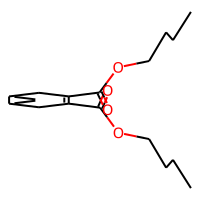

In [131]:
 
sdfFile = os.path.join(RDConfig.RDDataDir,"C:/Users/Authorized User1/Desktop/Data mining/SDF/84-74-2 Di-n-butylphthalate.sdf")
frame = PandasTools.LoadSDF(sdfFile,smilesName='SMILES',molColName='Molecule',includeFingerprints=True)
frame[['Molecule']]

In [46]:
SDF_frame = pd.DataFrame()
arr_sdf = os.listdir('C:/Users/Authorized User1/Desktop/Data mining/SDF')
for i in arr_sdf:
    sdf_file = ("C:/Users/Authorized User1/Desktop/Data mining/SDF/%s" % i)
    SDF_frame = SDF_frame.append(PandasTools.LoadSDF(sdf_file,smilesName='SMILES',molColName='Molecule',includeFingerprints=True))

SDF_frame.reset_index(inplace = True)

SDFindex = []
for i in arr_sdf:
    SDFindex.append(i.split(' ')[0])
        
 
SDF_frame['index'] = SDFindex 
SDF_frame.set_index('index',inplace = True)

In [47]:
df = SDF_frame

In [48]:
X = df.iloc[:,23:24]
X

,SMILES
index,
100-41-4,CCc1ccccc1
101-81-5,c1ccc(Cc2ccccc2)cc1
101-84-8,c1ccc(Oc2ccccc2)cc1
1016-05-3,O=S1(=O)c2ccccc2-c2ccccc21
1031-07-8,O=S1(=O)OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl
...,...
97-53-0,C=CCc1ccc(O)c(OC)c1
97-63-2,C=C(C)C(=O)OCC
97143-65-2,CN(C)CCOC(C)(c1ccccc1)c1cccc[n+]1[O-]


In [49]:
from rdkit import Chem
 
SMILES_CHARS = [' ',
                  '#', '%', '(', ')', '+', '-', '.', '/',
                  '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                  '=', '@',
                  'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P',
                  'R', 'S', 'T', 'V', 'X', 'Z',
                  '[', '\\', ']',
                  'a', 'b', 'c', 'e', 'g', 'i', 'l', 'n', 'o', 'p', 'r', 's',
                  't', 'u']
smi2index = dict( (c,i) for i,c in enumerate( SMILES_CHARS ) )
index2smi = dict( (i,c) for i,c in enumerate( SMILES_CHARS ) )
def smiles_encoder( smiles, maxlen=120 ):
    smiles = Chem.MolToSmiles(Chem.MolFromSmiles( smiles ))
    X1 = np.zeros( ( maxlen, len( SMILES_CHARS ) ) )
    for i, c in enumerate( smiles ):
        X1[i, smi2index[c] ] = 1
    return X1
 
def smiles_decoder( X1 ):
    smi = ''
    X1 = X1.argmax( axis=-1 )
    for i in X1:
        smi += index2smi[ i ]
    return smi


In [50]:
smiles = X['SMILES'].tolist()
smiles_encode = []
for i in smiles:
    encode = []
    mat = smiles_encoder(i)
    for i in mat:
        encode.extend(i)
    smiles_encode.append(encode)

    
X['SMILE_ONE_HOT'] = smiles_encode

<ipython-input-50-27d01d91324e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SMILE_ONE_HOT'] = smiles_encode


In [51]:
X

,SMILES,SMILE_ONE_HOT
index,,
100-41-4,CCc1ccccc1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
101-81-5,c1ccc(Cc2ccccc2)cc1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
101-84-8,c1ccc(Oc2ccccc2)cc1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1016-05-3,O=S1(=O)c2ccccc2-c2ccccc21,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1031-07-8,O=S1(=O)OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
97-53-0,C=CCc1ccc(O)c(OC)c1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
97-63-2,C=C(C)C(=O)OCC,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
97143-65-2,CN(C)CCOC(C)(c1ccccc1)c1cccc[n+]1[O-],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [52]:
MolWt=[]
MolLogp=[]
CalTPSA=[]
for i in X['SMILES']:
    m=Chem.MolFromSmiles(i)
    MolWt.append(ExactMolWt(m))
    MolLogp.append(MolLogP(m))
    CalTPSA.append(CalcTPSA(m))
    
X['Mol_Wt']=MolWt
X['Mol_log_P']=MolLogp
X['Calc_TPSA']=CalTPSA

<ipython-input-52-1d57d4ccf61b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Mol_Wt']=MolWt
<ipython-input-52-1d57d4ccf61b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Mol_log_P']=MolLogp
<ipython-input-52-1d57d4ccf61b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [53]:
X.shape

(195, 5)

In [54]:
ms = [Chem.MolFromSmiles(i) for i in X['SMILES']]
pair_vec = [Pairs.GetAtomPairFingerprintAsBitVect(x) for x in ms]
pair_vect_binary = [i.ToBitString() for i in pair_vec]

In [55]:
fps = []
for a in pair_vect_binary:
    fps1 = [ int(i) for i in a]
    fps.append((fps1))
type(fps[0])

list

In [56]:
X['encoded_fps'] = fps

<ipython-input-56-14532b5a26ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['encoded_fps'] = fps


In [57]:
X

,SMILES,SMILE_ONE_HOT,Mol_Wt,Mol_log_P,Calc_TPSA,encoded_fps
index,,,,,,
100-41-4,CCc1ccccc1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",106.078250,2.2490,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
101-81-5,c1ccc(Cc2ccccc2)cc1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",168.093900,3.2774,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
101-84-8,c1ccc(Oc2ccccc2)cc1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",170.073165,3.4789,9.23,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1016-05-3,O=S1(=O)c2ccccc2-c2ccccc21,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",216.024500,2.4998,34.14,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1031-07-8,O=S1(=O)OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",419.811796,3.3559,52.60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
97-53-0,C=CCc1ccc(O)c(OC)c1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",164.083730,2.1293,29.46,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
97-63-2,C=C(C)C(=O)OCC,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",114.068080,1.1256,26.30,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
97143-65-2,CN(C)CCOC(C)(c1ccccc1)c1cccc[n+]1[O-],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",286.168128,2.1617,39.41,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [58]:
X_1 = X['encoded_fps']
Y_1 = X[['Mol_Wt', 'Mol_log_P', 'Calc_TPSA']]

X_in = []
for i in range(len(X)):
    X_in.append(np.array(X_1[i]))

x_1 = np.array(X_in)

y_1 = np.array(Y_1)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

x = x_1
y = y_1
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=5, random_state = 42)
pca2.fit(X_train)
X_N_dims_train = pca2.transform(X_train)
X_N_dims_train
X_N_dims_test = pca2.transform(X_test)

In [61]:
X_N_dims_train.shape

(130, 5)

In [122]:
model = LinearRegression()

model.fit(X_N_dims_train, y_train)

y_pred = model.predict(X_N_dims_test)

from sklearn.metrics import r2_score
print("r2 score:", r2_score(y_test, y_pred))

p = 5
n = len(y_test)
numerator = n - 1
denominator = n - p - 1
r2_adjusted = 1 - ( (1-(r2_score(y_test, y_pred))) *(numerator/denominator))
print("Adjusted R2 score:", r2_adjusted)

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=True) 
print("Root Mean Squared Error:", rmse)

from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

linear_regression = {}
linear_regression['R2_score'] = r2_score(y_test, y_pred)
linear_regression['Adjusted_R2_score'] = r2_adjusted
linear_regression['RMSE'] = rmse
linear_regression['MAE'] = mae


r2 score: 0.4324478403646677
Adjusted R2 score: 0.38435019971760565
Root Mean Squared Error: 1435.68583571828
Mean Absolute Error: 20.513405472717864


In [123]:
df_test = pd.DataFrame(data = y_test,columns = ['Mol_Wt_test','Mol_log_P_test','Calc_TPSA_test'], index = [i for i in range(len(y_test))])
df_pred = pd.DataFrame(data = y_pred,columns = ['Mol_Wt_pred','Mol_log_P_pred','Calc_TPSA_pred'], index = [i for i in range(len(y_pred))])

<AxesSubplot:title={'center':'Linear regression(Mol_Wt_test vs Mol_Wt_pred)'}, ylabel='Mol_Wt_test'>

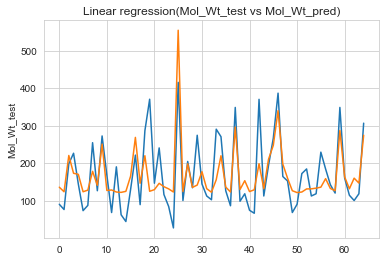

In [124]:
sns.lineplot(data=df_test, x = df_test.index, y = df_test['Mol_Wt_test']).set(title='Linear regression(Mol_Wt_test vs Mol_Wt_pred)')
sns.lineplot(data=df_pred, x = df_pred.index, y = df_pred['Mol_Wt_pred'])

<AxesSubplot:title={'center':'Linear regression (Mol_log_P_test vs Mol_log_P_pred)'}, ylabel='Mol_log_P_test'>

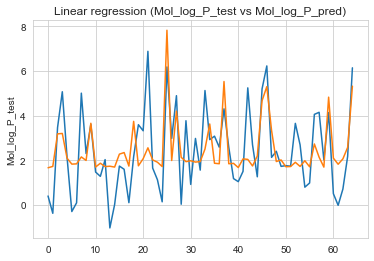

In [125]:
sns.lineplot(data=df_test, x = df_test.index, y = df_test['Mol_log_P_test']).set(title='Linear regression (Mol_log_P_test vs Mol_log_P_pred)')
sns.lineplot(data=df_pred, x = df_pred.index, y = df_pred['Mol_log_P_pred'])

<AxesSubplot:title={'center':'Linear regression (Calc_TPSA_test vs Calc_TPSA_pred)'}, ylabel='Calc_TPSA_test'>

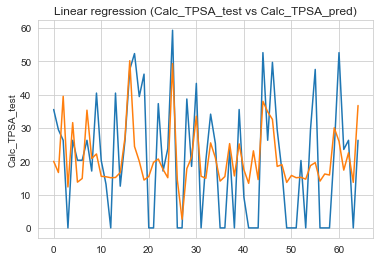

In [126]:
sns.lineplot(data=df_test, x = df_test.index, y = df_test['Calc_TPSA_test']).set(title='Linear regression (Calc_TPSA_test vs Calc_TPSA_pred)')
sns.lineplot(data=df_pred, x = df_pred.index, y = df_pred['Calc_TPSA_pred'])

In [115]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_N_dims_train, y_train)

y_pred = model.predict(X_N_dims_test)

print("r2 score:", r2_score(y_test, y_pred))

p = 5
n = len(y_test)
numerator = n - 1
denominator = n - p - 1
r2_adjusted = 1 - ( (1-(r2_score(y_test, y_pred))) *(numerator/denominator))
print("Adjusted R2 score:", r2_adjusted)

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=True) 
print("Root Mean Squared Error:", rmse)

from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

KNN = {}
KNN['R2_score'] = r2_score(y_test, y_pred)
KNN['Adjusted_R2_score'] = r2_adjusted
KNN['RMSE'] = rmse
KNN['MAE'] = mae

r2 score: 0.47537665461357204
Adjusted R2 score: 0.4309170490723493
Root Mean Squared Error: 1310.1899957762068
Mean Absolute Error: 17.495700690057433


In [116]:
df_test = pd.DataFrame(data = y_test,columns = ['Mol_Wt_test','Mol_log_P_test','Calc_TPSA_test'], index = [i for i in range(len(y_test))])
df_pred = pd.DataFrame(data = y_pred,columns = ['Mol_Wt_pred','Mol_log_P_pred','Calc_TPSA_pred'], index = [i for i in range(len(y_pred))])

<AxesSubplot:title={'center':'KNN (Mol_Wt_test vs Mol_Wt_pred)'}, ylabel='Mol_Wt_test'>

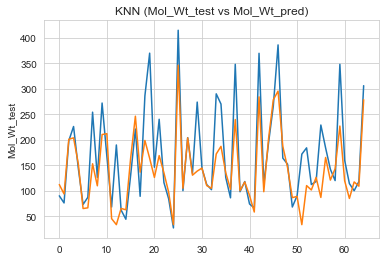

In [117]:
sns.lineplot(data=df_test, x = df_test.index, y = df_test['Mol_Wt_test']).set(title='KNN (Mol_Wt_test vs Mol_Wt_pred)')
sns.lineplot(data=df_pred, x = df_pred.index, y = df_pred['Mol_Wt_pred'])

<AxesSubplot:title={'center':'KNN (Mol_log_P_test vs Mol_log_P_pred)'}, ylabel='Mol_log_P_test'>

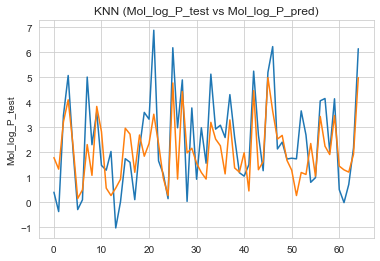

In [121]:
sns.lineplot(data=df_test, x = df_test.index, y = df_test['Mol_log_P_test']).set(title='KNN (Mol_log_P_test vs Mol_log_P_pred)')
sns.lineplot(data=df_pred, x = df_pred.index, y = df_pred['Mol_log_P_pred'])

<AxesSubplot:title={'center':'KNN (Calc_TPSA_test vs Calc_TPSA_pred)'}, ylabel='Calc_TPSA_test'>

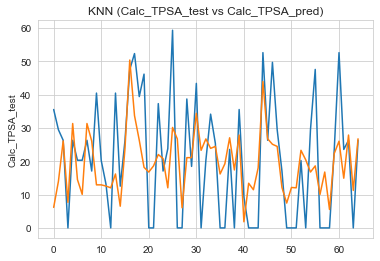

In [119]:
sns.lineplot(data=df_test, x = df_test.index, y = df_test['Calc_TPSA_test']).set(title='KNN (Calc_TPSA_test vs Calc_TPSA_pred)')
sns.lineplot(data=df_pred, x = df_pred.index, y = df_pred['Calc_TPSA_pred'])

In [64]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
#X, y = make_regression(n_samples=10, n_targets=3, random_state=1)
model = MultiOutputRegressor(GradientBoostingRegressor( random_state=42)) 
model.fit(X_N_dims_train, y_train)

y_pred = model.predict(X_N_dims_test)

print("r2 score:", r2_score(y_test, y_pred))

p = 5
n = len(y_test)
numerator = n - 1
denominator = n - p - 1
r2_adjusted = 1 - ( (1-(r2_score(y_test, y_pred))) *(numerator/denominator))
print("Adjusted R2 score:", r2_adjusted)

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=True) 
print("Root Mean Squared Error:", rmse)

from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
gradient_boosting = {}
gradient_boosting['R2_score'] = r2_score(y_test, y_pred)
gradient_boosting['Adjusted_R2_score'] = r2_adjusted
gradient_boosting['RMSE'] = rmse
gradient_boosting['MAE'] = mae

r2 score: 0.5625011824969045
Adjusted R2 score: 0.5254250115220659
Root Mean Squared Error: 1022.2237616776137
Mean Absolute Error: 17.09753097653955


In [80]:
df_test = pd.DataFrame(data = y_test,columns = ['Mol_Wt_test','Mol_log_P_test','Calc_TPSA_test'], index = [i for i in range(len(y_test))])
df_pred = pd.DataFrame(data = y_pred,columns = ['Mol_Wt_pred','Mol_log_P_pred','Calc_TPSA_pred'], index = [i for i in range(len(y_pred))])

<AxesSubplot:title={'center':'GradientBoosting(Mol_Wt_test vs Mol_Wt_pred)'}, ylabel='Mol_Wt_test'>

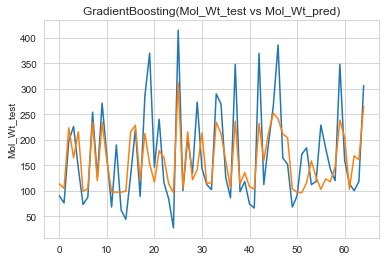

In [112]:
sns.lineplot(data=df_test, x = df_test.index, y = df_test['Mol_Wt_test']).set(title='GradientBoosting(Mol_Wt_test vs Mol_Wt_pred)')
sns.lineplot(data=df_pred, x = df_pred.index, y = df_pred['Mol_Wt_pred'])

<AxesSubplot:title={'center':'GradientBoosting(Mol_log_P_test vs Mol_log_P_pred)'}, ylabel='Mol_log_P_test'>

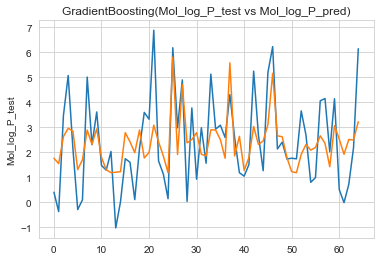

In [113]:
sns.lineplot(data=df_test, x = df_test.index, y = df_test['Mol_log_P_test']).set(title='GradientBoosting(Mol_log_P_test vs Mol_log_P_pred)')
sns.lineplot(data=df_pred, x = df_pred.index, y = df_pred['Mol_log_P_pred'])

<AxesSubplot:title={'center':'GradientBoosting(Calc_TPSA_test vs Calc_TPSA_pred)'}, ylabel='Calc_TPSA_test'>

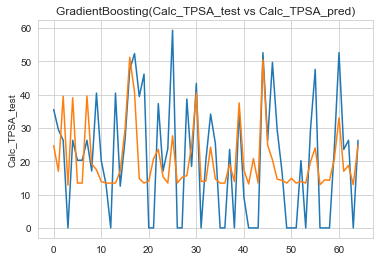

In [114]:
sns.lineplot(data=df_test, x = df_test.index, y = df_test['Calc_TPSA_test']).set(title='GradientBoosting(Calc_TPSA_test vs Calc_TPSA_pred)')
sns.lineplot(data=df_pred, x = df_pred.index, y = df_pred['Calc_TPSA_pred'])

In [84]:
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(RandomForestRegressor(max_depth=2, random_state=42)) 
model.fit(X_N_dims_train, y_train)

y_pred = model.predict(X_N_dims_test)

print("r2 score:", r2_score(y_test, y_pred))

p = 5
n = len(y_test)
numerator = n - 1
denominator = n - p - 1
r2_adjusted = 1 - ( (1-(r2_score(y_test, y_pred))) *(numerator/denominator))
print("Adjusted R2 score:", r2_adjusted)

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=True) 
print("Root Mean Squared Error:", rmse)

from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
random_forest = {}
random_forest['R2_score'] = r2_score(y_test, y_pred)
random_forest['Adjusted_R2_score'] = r2_adjusted
random_forest['RMSE'] = rmse
random_forest['MAE'] = mae

r2 score: 0.43990325455603463
Adjusted R2 score: 0.39243742867095277
Root Mean Squared Error: 1415.7243659115954
Mean Absolute Error: 20.676970960708715


In [85]:
df_test = pd.DataFrame(data = y_test,columns = ['Mol_Wt_test','Mol_log_P_test','Calc_TPSA_test'], index = [i for i in range(len(y_test))])
df_pred = pd.DataFrame(data = y_pred,columns = ['Mol_Wt_pred','Mol_log_P_pred','Calc_TPSA_pred'], index = [i for i in range(len(y_pred))])

<AxesSubplot:title={'center':'Random Forest (Mol_Wt_test vs Mol_Wt_pred)'}, ylabel='Mol_Wt_test'>

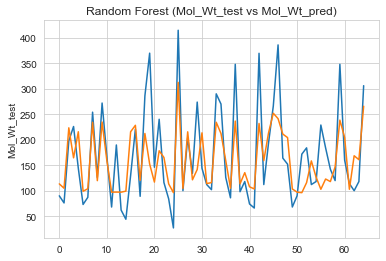

In [106]:
sns.lineplot(data=df_test, x = df_test.index, y = df_test['Mol_Wt_test']).set(title='Random Forest (Mol_Wt_test vs Mol_Wt_pred)')
sns.lineplot(data=df_pred, x = df_pred.index, y = df_pred['Mol_Wt_pred'])

<AxesSubplot:title={'center':'Random Forest (Mol_log_P_test vs Mol_log_P_pred)'}, ylabel='Mol_log_P_test'>

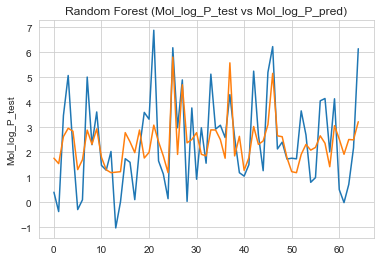

In [107]:
sns.lineplot(data=df_test, x = df_test.index, y = df_test['Mol_log_P_test']).set(title='Random Forest (Mol_log_P_test vs Mol_log_P_pred)')
sns.lineplot(data=df_pred, x = df_pred.index, y = df_pred['Mol_log_P_pred'])

<AxesSubplot:title={'center':'Random Forest (Calc_TPSA_test vs Calc_TPSA_pred)'}, ylabel='Calc_TPSA_test'>

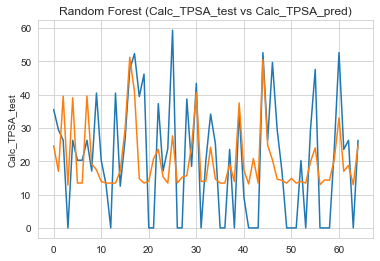

In [108]:
sns.lineplot(data=df_test, x = df_test.index, y = df_test['Calc_TPSA_test']).set(title='Random Forest (Calc_TPSA_test vs Calc_TPSA_pred)')
sns.lineplot(data=df_pred, x = df_pred.index, y = df_pred['Calc_TPSA_pred'])

In [89]:
#results = pd.DataFrame(KNN, index = ['KNN'])
results = {}
results['gradient_boosting'] = gradient_boosting
results['KNN'] = KNN
results['random_forest'] = random_forest
results['linear_regression'] = linear_regression
result = pd.DataFrame(results).T
result

,R2_score,Adjusted_R2_score,RMSE,MAE
gradient_boosting,0.562501,0.525425,1022.223762,17.097531
KNN,0.475377,0.430917,1310.189996,17.495701
random_forest,0.439903,0.392437,1415.724366,20.676971
linear_regression,0.432448,0.384350,1435.685836,20.513405


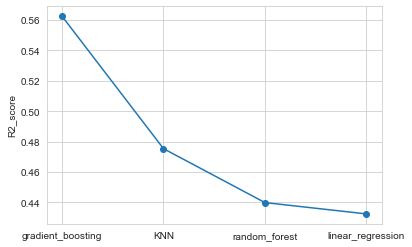

In [102]:
plt.plot(result['R2_score'],marker = 'o')
plt.ylabel("R2_score")
plt.show()

Text(0, 0.5, 'Adjusted_R2_score')

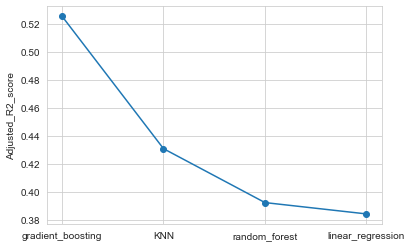

In [103]:
plt.plot(result['Adjusted_R2_score'], marker = 'o')
plt.ylabel("Adjusted_R2_score")

Text(0, 0.5, 'RMSE')

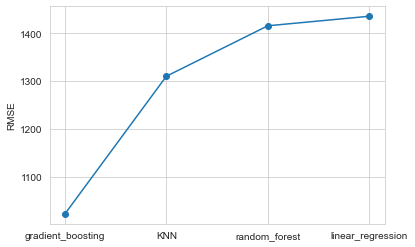

In [104]:
plt.plot(result['RMSE'], marker = 'o')
plt.ylabel("RMSE")

Text(0, 0.5, 'MAE')

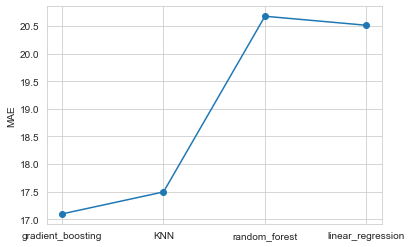

In [105]:
plt.plot(result['MAE'], marker = 'o')
plt.ylabel("MAE")